ROC: Rate of climb

Vc: Velocidad de crucer

Vl: Velocidad de Loiter

Hs: Service ceiling

Sg: Ground run

K: Lift-induced drag constant

$\phi$: Angulo de bankeo

n: carga de bankeo

q: Dynamic pressure

Vv: velocidad maxima de ascenso

In [ ]:
def f(x,y):
  return 4*x**2-4*x*y+y**2
f(2*5**0.5,5**0.5)

45.00000000000001

In [ ]:
N_lbf = 0.224809 #N
m_ft = 3.28084
m2_ft2 = m_ft**2
ms_knots = 1.94384
Nm2_lbfft2 = 0.020885

In [1]:
1733-33-20-40-196-79-40-20-44-70-60-30-30+800-60-70-1076-104-22-26+400-37-208-68-40-23-50-200-15-50

222

## Primer analisis

In [ ]:
T = 15.04-0.00649*3658
T

-8.700420000000001

In [ ]:
6.6743e-11

6.6743e-11

In [ ]:
#######################################################
######### IMPORTANTE TRABAJAR TODO EN SI ##############
import numpy as np
def density(h):
  if h > 25000:
    T = -131.21+0.00299*h
    p = 2.488*((T+273.1)/216.6)**-11.388
  elif (h>11000 and h<25000):
    T=-56.46
    p = 22.65*np.exp(1.73-0.000157*h)
  else:
    T = 15.04-0.00649*h
    p = 101.29*((T+273.1)/288.08)**5.256
  return p/(0.2869*(T+273.1))
########## DATOS ############
g = 9.81
W = 1466.85

Sg = 457 #1500 pies
k = 0.05
phi = 30*np.pi/180
n = 1/np.cos(phi)
u = 0.3
hzonoboyas = 150
hC = 3658
hTO = 0
hROC = 3000
hCS = 6096
hSto = 0
hS2 = 0

ROC = (hC-hzonoboyas)/(60*5) # 5 mins
Vc = 50
Vsto = 31.38 # 61 knot --> FAR 23
Vlof = 1.1*Vsto # FAR23
#VROC = 1.2*Vsto #ROC/np.sin(10*np.pi/180)  #1.2*Vsto --> FAR 23
#Vv = VROC # Gudmundson
Vs2 = 0



c = 1.0892
d = 0.5147
Swet = 10**(c+d*np.log10(W))
a = -2
b = 1
f = 10**(a+b*np.log10(Swet))



CDmin = f/Swet
CDTO = 0.015
CLTO = 0.4
CLmax = 1.6
CLmaxTO = 1.6
CDi = 0.1*CDmin #= (k*ws/q)
N = 1000
ws = np.linspace(0,3000,N)
######## FORMULAS ##########
#VROC = 0.51444*(2*101325/density(hROC)*(((((43.591+2.2452*(ws/47.8803))/295.07)**2+1)/5)**(7/2)+1))**0.5
#Vv = 0.51444*(2*101325/density(hCS)*(((((43.591+2.2452*(ws/47.8803))/295.07)**2+1)/5)**(7/2)+1))**0.5
VROC = 0.51444*(43.591+2.2452*(ws/47.8803))
Vv = 0.51444*(43.591+2.2452*(ws/47.8803))
#1N = 0,224809 lbf
#1m2 = 10,7639 pie 2
#N/m2*(0.224809/10.7639)
qC = 1/2*density(hC)*Vc**2
qTO = 1/4*density(hTO)*Vlof**2
qROC = 1/2*density(hROC)*VROC**2
qCS = 1/2*density(hCS)*Vv**2
qSto = 1/2*density(hSto)*Vsto**2
qS2 = 1/2*density(hS2)*Vs2**2

tw_climb = ROC/VROC+qROC*CDmin/ws+ k*ws/qROC
tw_cruise = qC*CDmin/ws + k*ws/qC
tw_CS = 0.508/Vv + qCS*CDmin/ws + k*ws/qCS #0.508/(2/(sw*pCS)*(k/3/CDmin)**0.5)**0.5+4*(k*CDmin/3)**0.5
tw_to = 1.21*ws/g/density(hTO)/CLmaxTO/Sg + 0.605*(CDTO-u*CLTO)/CLmax + u
#tw_to =Vlof**2/2/g/Sg+qTO*CDTO/ws+u*(1-qTO*CLTO/ws)
P_climb = tw_climb*W*g*VROC/0.75/1000
P_cruise = tw_cruise*W*g*Vc/0.85/1000
P_CS = tw_CS*W*g*Vv/0.85/1000
P_to = tw_to*W*g*Vlof/(2)**0.5/0.5/1000

<ipython-input-5-f2ce910b7012>:74: RuntimeWarning: divide by zero encountered in true_divide
  tw_climb = ROC/VROC+qROC*CDmin/ws+ k*ws/qROC
<ipython-input-5-f2ce910b7012>:75: RuntimeWarning: divide by zero encountered in true_divide
  tw_cruise = qC*CDmin/ws + k*ws/qC
<ipython-input-5-f2ce910b7012>:76: RuntimeWarning: divide by zero encountered in true_divide
  tw_CS = 0.508/Vv + qCS*CDmin/ws + k*ws/qCS #0.508/(2/(sw*pCS)*(k/3/CDmin)**0.5)**0.5+4*(k*CDmin/3)**0.5


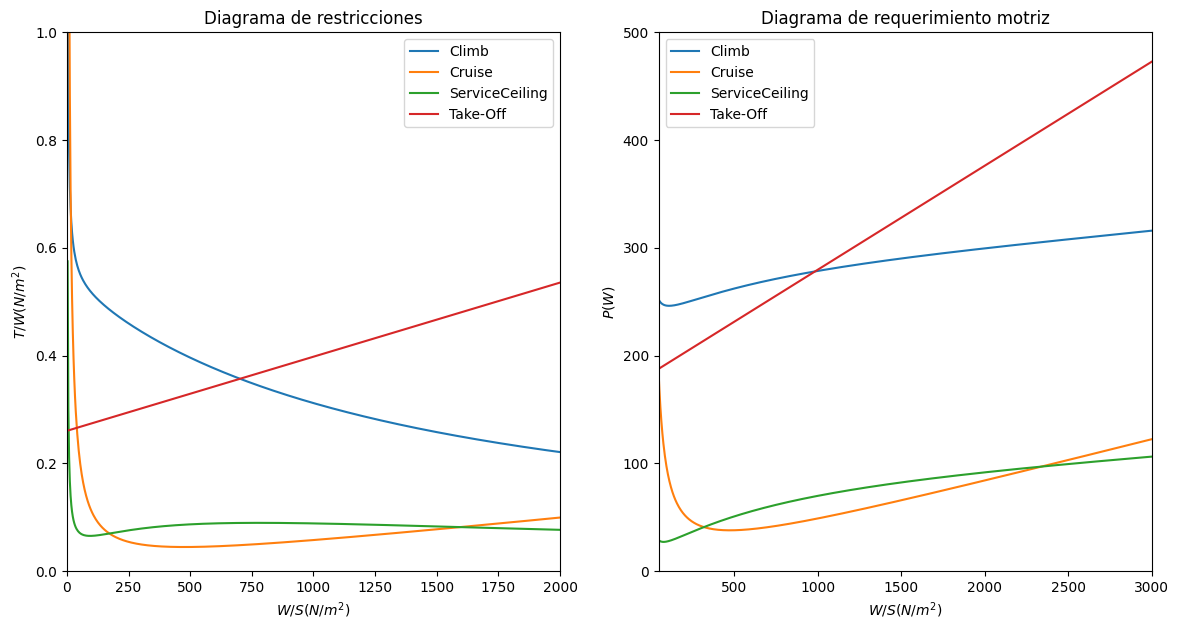

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,7))
ax1.plot(ws,tw_climb,label="Climb")
ax1.plot(ws,tw_cruise,label="Cruise")
ax1.plot(ws,tw_CS,label="ServiceCeiling")
ax1.plot(ws,tw_to,label="Take-Off")
ax1.set_title("Diagrama de restricciones")
ax1.set_xlabel(r"$W/S (N/m^2)$")
ax1.set_ylabel(r"$T/W (N/m^2)$")
ax1.set_xlim(0,2000)
ax1.set_ylim(0,1)
ax1.legend()
#extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('MatchingChart.png', bbox_inches=extent)
ax2.plot(ws,P_climb,label="Climb")
ax2.plot(ws,P_cruise,label="Cruise")
ax2.plot(ws,P_CS,label="ServiceCeiling")
ax2.plot(ws,P_to,label="Take-Off")
ax2.set_title("Diagrama de requerimiento motriz")
ax2.set_xlabel(r"$W/S (N/m^2)$")
ax2.set_ylabel(r"$P (W)$")
ax2.set_xlim(50,3000)
ax2.set_ylim(0,500)
ax2.legend()

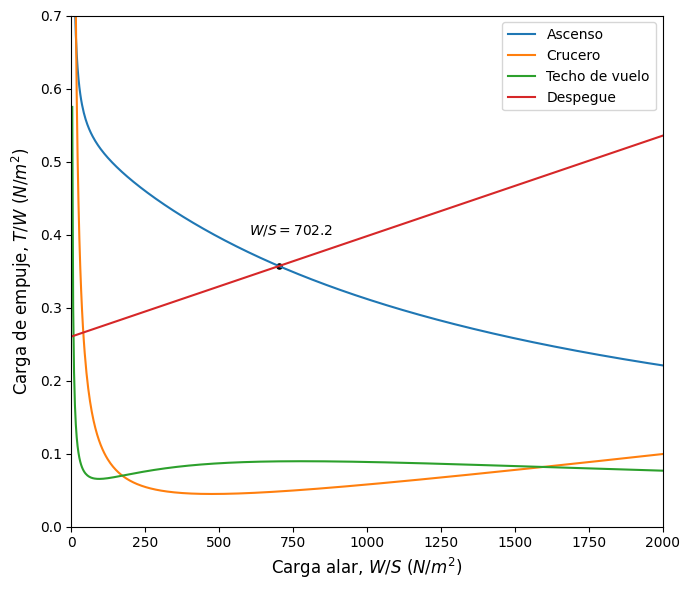

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,6))
plt.plot(ws,tw_climb,label="Ascenso")
plt.plot(ws,tw_cruise,label="Crucero")
plt.plot(ws,tw_CS,label="Techo de vuelo")
plt.plot(ws,tw_to,label="Despegue")
plt.scatter(702.2,0.356863629674606,c="black",s=14)
#plt.title("Diagrama de restricciones",fontsize=18)
plt.xlabel(r"Carga alar, $W/S\ (N/m^2)$",fontsize=12)
plt.ylabel(r"Carga de empuje, $T/W\ (N/m^2)$",fontsize=12)
plt.xlim(0,2000)
plt.ylim(0,0.7)
plt.text(600,0.4,r"$W/S=702.2$")
plt.legend()
plt.tight_layout()
plt.savefig("MatchingChart.png")

In [ ]:
from scipy.optimize import bisect

# main program starts here

def ecu(wwss):
  VROC = 0.51444*(43.591+2.2452*(wwss/47.8803))
  Vv = 0.51444*(43.591+2.2452*(wwss/47.8803))
  #1N = 0,224809 lbf
  #1m2 = 10,7639 pie 2
  #N/m2*(0.224809/10.7639)
  qC = 1/2*density(hC)*Vc**2
  qTO = 1/4*density(hTO)*Vlof**2
  qROC = 1/2*density(hROC)*VROC**2
  qCS = 1/2*density(hCS)*Vv**2
  qSto = 1/2*density(hSto)*Vsto**2
  qS2 = 1/2*density(hS2)*Vs2**2
  ec = ROC/VROC+qROC*CDmin/wwss+ k*wwss/qROC - (1.21*wwss/g/density(hTO)/CLmaxTO/Sg + 0.605*(CDTO-u*CLTO)/CLmax + u)
  return ec

A = 5e2
B = 8e2
WS = bisect(ecu, A, B, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (WS))

The root x is approximately x=  702.19106283,
the error is less than 1e-6.


In [ ]:
S = 1/WS*W*g
VROC = 0.51444*(43.591+2.2452*(WS/47.8803))
Vv = 0.51444*(43.591+2.2452*(WS/47.8803))
qROC = 1/2*density(hROC)*VROC**2
qCS = 1/2*density(hCS)*Vv**2

T = (ROC/VROC+qROC*CDmin/WS+ k*WS/qROC)*W*g
P = T*Vc/0.85/1000
S,T,P#,ROC/VROC+qROC*CDmin/WS+ k*WS/qROC

(20.492710975268842, 5135.1957229962, 302.0703366468353)

## Segundo análisis

Cambio: agregadas las lineas de stall y de aterrizaje, cambio de la tasa de ascenso y de los coeficientes.

In [ ]:
#######################################################
######### IMPORTANTE TRABAJAR TODO EN SI ##############
import numpy as np
def density(h):
  if h > 25000:
    T = -131.21+0.00299*h
    p = 2.488*((T+273.1)/216.6)**-11.388
  elif (h>11000 and h<25000):
    T=-56.46
    p = 22.65*np.exp(1.73-0.000157*h)
  else:
    T = 15.04-0.00649*h
    p = 101.29*((T+273.1)/288.08)**5.256
  return p/(0.2869*(T+273.1))
########## DATOS ############
g = 9.81
W = 1466.85

Sg = 457 #1500 pies
k = 0.05
phi = 30*np.pi/180
n = 1/np.cos(phi)
u = 0.06
hzonoboyas = 150
hC = 3658
hTO = 0
hROC = 3000
hCS = 6096
hSto = 0
hS2 = 0

ROC = (hC-hzonoboyas)/(60*20) # 5 mins
Vc = 50
Vsto = 31.38 # 61 knot --> FAR 23
Vlof = 1.1*Vsto # FAR23
#VROC = 1.2*Vsto #ROC/np.sin(10*np.pi/180)  #1.2*Vsto --> FAR 23
#Vv = VROC # Gudmundson
Vs2 = 0



c = 1.0892
d = 0.5147
Swet = 10**(c+d*np.log10(W))
a = -2
b = 1
f = 10**(a+b*np.log10(Swet))



CDmin = f/Swet


CLmax = 1.6
CLmaxTO = 1.9
CLTO = CLmaxTO/1.21
CDTO = CDmin + k*CLTO**2
CDTO = CDmin
#CDTO = 0.015
CDi = 0.1*CDmin #= (k*ws/q)
N = 1000
ws = np.linspace(0,3000,N)
######## FORMULAS ##########
#VROC = 0.51444*(2*101325/density(hROC)*(((((43.591+2.2452*(ws/47.8803))/295.07)**2+1)/5)**(7/2)+1))**0.5
#Vv = 0.51444*(2*101325/density(hCS)*(((((43.591+2.2452*(ws/47.8803))/295.07)**2+1)/5)**(7/2)+1))**0.5
VROC = 0.51444*(43.591+2.2452*(ws/47.8803))
Vv = 0.51444*(43.591+2.2452*(ws/47.8803))
#1N = 0,224809 lbf
#1m2 = 10,7639 pie 2
#N/m2*(0.224809/10.7639)
qC = 1/2*density(hC)*Vc**2
qTO = 1/4*density(hTO)*Vlof**2
qROC = 1/2*density(hROC)*VROC**2
qCS = 1/2*density(hCS)*Vv**2
qSto = 1/2*density(hSto)*Vsto**2
qS2 = 1/2*density(hS2)*Vs2**2

### LANDING DISTANCE
VsL = (1500/0.5136)**0.5/ms_knots #1500 pies
qsL = 1/2*density(hTO)*VsL**2

tw_climb = ROC/VROC+qROC*CDmin/ws+ k*ws/qROC
tw_cruise = qC*CDmin/ws + k*ws/qC
tw_CS = 0.508/Vv + qCS*CDmin/ws + k*ws/qCS #0.508/(2/(sw*pCS)*(k/3/CDmin)**0.5)**0.5+4*(k*CDmin/3)**0.5
tw_to = 1.21*ws/g/density(hTO)/CLmaxTO/Sg + 0.605*(CDTO-u*CLTO)/CLmax + u

ws_s1 = np.zeros(N)+1.6/1.9*CLmaxTO*qSto
ws_s2 = np.zeros(N)+CLmaxTO*qSto
ws_L = np.zeros(N)+CLmaxTO*qsL

#tw_to =Vlof**2/2/g/Sg+qTO*CDTO/ws+u*(1-qTO*CLTO/ws)
P_climb = tw_climb*W*g*VROC/0.75/1000
P_cruise = tw_cruise*W*g*Vc/0.85/1000
P_CS = tw_CS*W*g*Vv/0.85/1000
P_to = tw_to*W*g*Vlof/(2)**0.5/0.5/1000

<ipython-input-10-5c249d0b2fbf>:82: RuntimeWarning: divide by zero encountered in true_divide
  tw_climb = ROC/VROC+qROC*CDmin/ws+ k*ws/qROC
<ipython-input-10-5c249d0b2fbf>:83: RuntimeWarning: divide by zero encountered in true_divide
  tw_cruise = qC*CDmin/ws + k*ws/qC
<ipython-input-10-5c249d0b2fbf>:84: RuntimeWarning: divide by zero encountered in true_divide
  tw_CS = 0.508/Vv + qCS*CDmin/ws + k*ws/qCS #0.508/(2/(sw*pCS)*(k/3/CDmin)**0.5)**0.5+4*(k*CDmin/3)**0.5


In [ ]:
CDTO,ROC,CDmin

(0.009999999999999998, 2.9233333333333333, 0.009999999999999998)

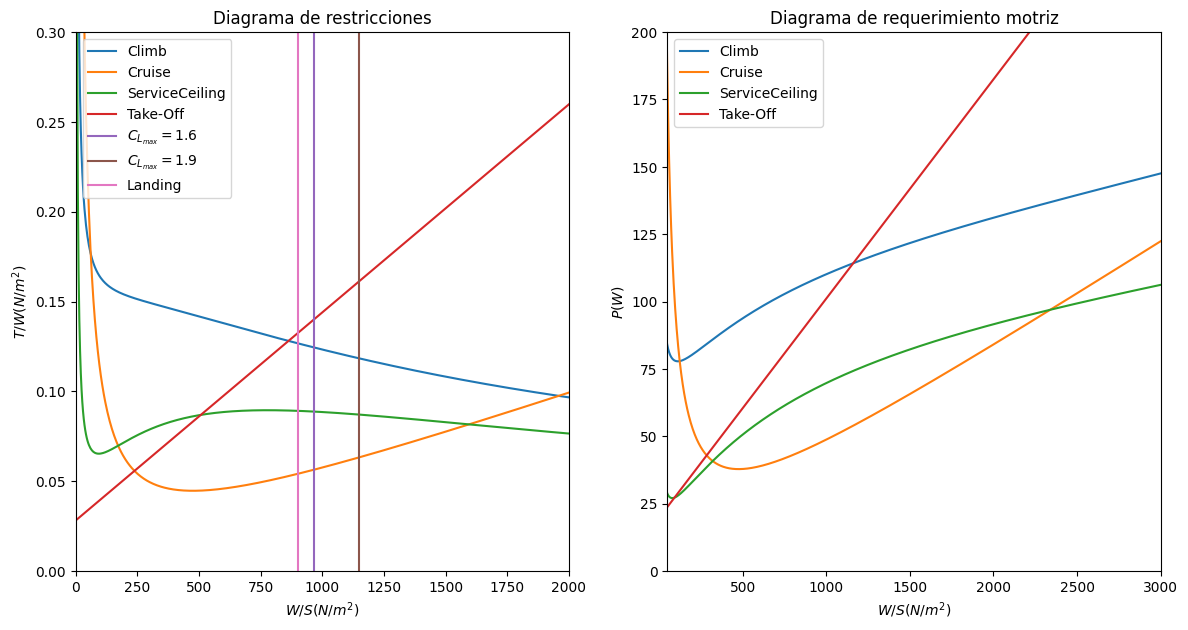

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,7))
tw0=0.3

tw = np.linspace(0,tw0,N)

ax1.plot(ws,tw_climb,label="Climb")
ax1.plot(ws,tw_cruise,label="Cruise")
ax1.plot(ws,tw_CS,label="ServiceCeiling")
ax1.plot(ws,tw_to,label="Take-Off")
ax1.plot(ws_s1,tw,label=r"$C_{L_{max}} = 1.6$")
ax1.plot(ws_s2,tw,label=r"$C_{L_{max}} = 1.9$")
ax1.plot(ws_L,tw,label="Landing")
ax1.set_title("Diagrama de restricciones")
ax1.set_xlabel(r"$W/S (N/m^2)$")
ax1.set_ylabel(r"$T/W (N/m^2)$")
ax1.set_xlim(0,2000)
ax1.set_ylim(0,tw0)
ax1.legend()
#extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('MatchingChart.png', bbox_inches=extent)
ax2.plot(ws,P_climb,label="Climb")
ax2.plot(ws,P_cruise,label="Cruise")
ax2.plot(ws,P_CS,label="ServiceCeiling")
ax2.plot(ws,P_to,label="Take-Off")
ax2.set_title("Diagrama de requerimiento motriz")
ax2.set_xlabel(r"$W/S (N/m^2)$")
ax2.set_ylabel(r"$P (W)$")
ax2.set_xlim(50,3000)
ax2.set_ylim(0,200)
ax2.legend()

In [ ]:
import numpy as np
def Temperature(h):
  if h > 25000:
    T = -131.21+0.00299*h
    p = 2.488*((T+273.1)/216.6)**-11.388
  elif (h>11000 and h<25000):
    T=-56.46
    p = 22.65*np.exp(1.73-0.000157*h)
  else:
    T = 15.04-0.00649*h
    p = 101.29*((T+273.1)/288.08)**5.256
  return T

Temperature(hROC),Temperature(hC),VROC
# Mach Cruise: 0.15338


(-4.43,
 -8.700420000000001,
 array([22.42495404, 22.49739575, 22.56983745, 22.64227916, 22.71472086,
        22.78716257, 22.85960427, 22.93204598, 23.00448768, 23.07692939,
        23.1493711 , 23.2218128 , 23.29425451, 23.36669621, 23.43913792,
        23.51157962, 23.58402133, 23.65646303, 23.72890474, 23.80134645,
        23.87378815, 23.94622986, 24.01867156, 24.09111327, 24.16355497,
        24.23599668, 24.30843838, 24.38088009, 24.4533218 , 24.5257635 ,
        24.59820521, 24.67064691, 24.74308862, 24.81553032, 24.88797203,
        24.96041373, 25.03285544, 25.10529715, 25.17773885, 25.25018056,
        25.32262226, 25.39506397, 25.46750567, 25.53994738, 25.61238908,
        25.68483079, 25.7572725 , 25.8297142 , 25.90215591, 25.97459761,
        26.04703932, 26.11948102, 26.19192273, 26.26436443, 26.33680614,
        26.40924785, 26.48168955, 26.55413126, 26.62657296, 26.69901467,
        26.77145637, 26.84389808, 26.91633978, 26.98878149, 27.0612232 ,
        27.1336649 , 2

In [ ]:
from scipy.optimize import bisect

# main program starts here

def ecu(wwss):
  VROC = 0.51444*(43.591+2.2452*(wwss/47.8803))
  Vv = 0.51444*(43.591+2.2452*(wwss/47.8803))
  #1N = 0,224809 lbf
  #1m2 = 10,7639 pie 2
  #N/m2*(0.224809/10.7639)
  qC = 1/2*density(hC)*Vc**2
  qTO = 1/4*density(hTO)*Vlof**2
  qROC = 1/2*density(hROC)*VROC**2
  qCS = 1/2*density(hCS)*Vv**2
  qSto = 1/2*density(hSto)*Vsto**2
  qS2 = 1/2*density(hS2)*Vs2**2
  ec = ROC/VROC+qROC*CDmin/wwss+ k*wwss/qROC - (1.21*wwss/g/density(hTO)/CLmaxTO/Sg + 0.605*(CDTO-u*CLTO)/CLmax + u)
  return ec

A = 8e2
B = 9e2
WS = bisect(ecu, A, B, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (WS))

The root x is approximately x= 863.292831928,
the error is less than 1e-6.


In [ ]:
VROC,Vc

(array([22.42495404, 22.49739575, 22.56983745, 22.64227916, 22.71472086,
        22.78716257, 22.85960427, 22.93204598, 23.00448768, 23.07692939,
        23.1493711 , 23.2218128 , 23.29425451, 23.36669621, 23.43913792,
        23.51157962, 23.58402133, 23.65646303, 23.72890474, 23.80134645,
        23.87378815, 23.94622986, 24.01867156, 24.09111327, 24.16355497,
        24.23599668, 24.30843838, 24.38088009, 24.4533218 , 24.5257635 ,
        24.59820521, 24.67064691, 24.74308862, 24.81553032, 24.88797203,
        24.96041373, 25.03285544, 25.10529715, 25.17773885, 25.25018056,
        25.32262226, 25.39506397, 25.46750567, 25.53994738, 25.61238908,
        25.68483079, 25.7572725 , 25.8297142 , 25.90215591, 25.97459761,
        26.04703932, 26.11948102, 26.19192273, 26.26436443, 26.33680614,
        26.40924785, 26.48168955, 26.55413126, 26.62657296, 26.69901467,
        26.77145637, 26.84389808, 26.91633978, 26.98878149, 27.0612232 ,
        27.1336649 , 27.20610661, 27.27854831, 27.3

In [ ]:
#WS = ws_L[0]
S = 1/WS*W*g
VROC = 0.51444*(43.591+2.2452*(WS/47.8803))
Vv = 0.51444*(43.591+2.2452*(WS/47.8803))
qROC = 1/2*density(hROC)*VROC**2
qCS = 1/2*density(hCS)*Vv**2

TW = (ROC/VROC+qROC*CDmin/WS+ k*WS/qROC)
T = TW*W*g
P = T*Vc/0.85/1000
S,T,P,Vv#,ROC/VROC+qROC*CDmin/WS+ k*WS/qROC

(16.668502236802812,
 1843.8008959705435,
 108.45887623356138,
 43.250242951690474)

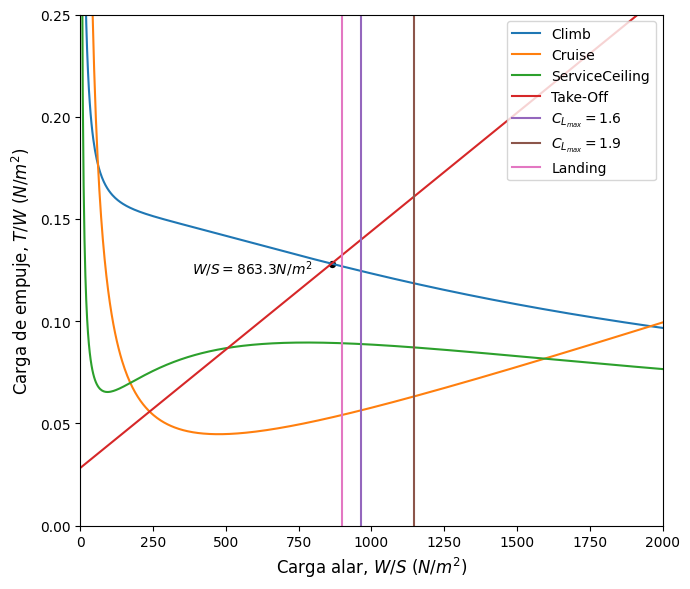

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,6))
plt.plot(ws,tw_climb,label="Climb")
plt.plot(ws,tw_cruise,label="Cruise")
plt.plot(ws,tw_CS,label="ServiceCeiling")
plt.plot(ws,tw_to,label="Take-Off")
plt.plot(ws_s1,tw,label=r"$C_{L_{max}} = 1.6$")
plt.plot(ws_s2,tw,label=r"$C_{L_{max}} = 1.9$")
plt.plot(ws_L,tw,label="Landing")
plt.scatter(WS,TW,c="black",s=18)
#plt.title("Diagrama de restricciones",fontsize=18)
plt.xlabel(r"Carga alar, $W/S\ (N/m^2)$",fontsize=12)
plt.ylabel(r"Carga de empuje, $T/W\ (N/m^2)$",fontsize=12)
plt.xlim(0,2000)
plt.ylim(0,0.25)
plt.text(WS-480,TW-0.005,r"$W/S=863.3 N/m^2$")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("MatchingChartFinal.png")

## WING DESIGN

In [ ]:
CDmin,CDTO,CLTO

(0.009999999999999998, 0.009999999999999998, 1.5702479338842974)

In [ ]:
Wf = 443.227
Wavg=W-Wf/2
Wavg
CLc = 2*g*Wavg/density(hC)/Vc**2/S
CLc

0.6891874095908692

In [ ]:
import numpy as np
E = 30 #h
SFChp = 0.6 #lb/hr/HP  ->  Roskam
#SFC = SFChp*745.7*4.44822*P/((W1-W2)*g) #1/h
Np = 0.85

Wf = 443.227
Wavg=W-Wf/2
CLc = 2*g*Wavg/density(hC)/Vc**2/S

WR=np.exp(E*SFChp*(Vc*ms_knots)/325.9/Np/22.36)#np.exp(E*SFChp*(Vc*ms_knots)*CDTO/325.9/Np/CLTO)
#W1=W2*WR

#Wavg = (W1+W2)/2
CLc = 2*g*Wavg/density(hC)/Vc**2/S
AA = 325.9*Np*CLc*np.log(WR)/SFChp/(Vc*ms_knots)/E # USAR SFC en lb/h/HP
if AA>CDmin:
  ARe = CLc**2/np.pi/(AA-CDmin)
else:
  print("No se cumple el requisito de velocidad en crucero")
WR,CDmin,AA,CLc,Vc,S,ARe,AA>CDmin,CLc/CDmin

(1.3263636883849013,
 0.009999999999999998,
 0.030822334954868934,
 0.6891874095908692,
 50,
 16.668502236802812,
 7.26098214475644,
 True,
 68.91874095908693)

In [ ]:
SFC = SFChp*745.7*4.44822*P/((Wavg)*g) #1/h
AR = -CLc**2/(np.pi*(CLc*np.log(WR)/(E*SFC)-CDmin))
AR,1100*WR

(15.695388864652717, 1459.0000572233914)

In [ ]:
## Usando Scholz para estimar el e teorico

c = 325.982 #sound velocity at cruise
import sympy as sp
x = sp.Symbol("x")
tap = 0.45
sweep = 0
deltatap = -0.357+0.45*np.exp(0.0375*sweep)
f = 0.0524*x**4 - 0.15*x**3 + 0.1659*x**2 - 0.0706*x + 0.0119
e_theo = 1/(1+f.subs(x,tap-deltatap)*AR)
kf = 0.98
kedo = 0.834
e = e_theo*kf*kedo
e_theo,e

(0.971548111404569, 0.794065702413183)

In [ ]:
LDmax = 1/(4*k*CDmin)**0.5#22.36
AR_LD = (LDmax + 0.443)/1.7405
AR_LD
LDmax,AR, 1.78*(1-0.045*AR**0.68)-0.64

(22.3606797749979, 15.695388864652717, 0.6190961940691236)

In [ ]:
e_LD = 1.78*(1-0.045*AR_LD**0.68)-0.64
e_LD

0.6793007213716086

In [ ]:
"""from scipy.optimize import bisect
def OswaldAR(y):
  fun = ARe/y - 1.78*(1-0.045*y**0.68)+0.64
  return fun
A = 0.1
B = 50
AR = bisect(OswaldAR, A, B, xtol=1e-6)

e = ARe/AR
tap = 0.5"""
b = (AR*S)**0.5
cavg = b/AR
cr = 2*b/(1+tap)/AR
ct = cr*tap
cMGC = 4*b*(1+tap+tap**2)/3/AR/(1+2*tap+tap**2)
b,cr,ct,cavg,cMGC
#c(y)=cr(1+(2*(tap-1)*y)/b) formula del valor de cuerda

(16.174629034322663,
 1.4214259578514443,
 0.63964168103315,
 1.030533819442297,
 1.0799569633790858)

In [ ]:
AR,ARe,e,1/np.pi/ARe

(15.695388864652717, 7.26098214475644, 0.794065702413183, 0.04383840640810004)

In [ ]:
import sympy as sp
y = sp.Symbol("y")
cs=cr*(1+(2*(tap-1)*y/b))
cs

1.42142595785144 - 0.0966679699620119*y

In [ ]:
yMGC=sp.solve(cs-cMGC,y)
yMGC

[3.53239024887507]

In [ ]:
d

0.5147

In [ ]:
nmax = 1.5*(1/np.cos(np.arcsin(ROC/Vv)))
nmax = 1.5*(1/np.cos(np.pi/3))
nmax,ROC,Vv,1.5/np.cos(np.deg2rad(21)),np.arctan2(Vc**2,g*7e2)*180/np.pi

(2.999999999999999,
 2.9233333333333333,
 43.250242951690474,
 1.6067174904555435,
 20.00454127947721)

In [ ]:
N_lbf = 0.224809 #N
m_ft = 3.28084
m2_ft2 = m_ft**2
ms_knots = 1.94384
Nm2_lbfft2 = 0.020885

In [ ]:
tc=20/100
Wf = 443.227*g
W0 =  1466.851*g
Ww = 0.036*(S*m2_ft2)**0.758*(Wf*N_lbf)**0.0035*(AR)**0.6*(qC*Nm2_lbfft2)**0.006*tap*0.04*(100*tc)**(-0.3)*(nmax*W0*N_lbf)**0.49
Ww/N_lbf/g

2.991211255236374

In [ ]:
S*m_ft,Wf*N_lbf,AR,qC*Nm2_lbfft2,tap,tc,nmax,W0*N_lbf,density(1)

(54.686688878592136,
 977.4823168878302,
 15.695388864652717,
 22.208611986726883,
 0.45,
 0.2,
 2.999999999999999,
 3234.9584163627906,
 1.2264962070792322)

In [ ]:
from astropy import units as u
from astropy.units import imperial
Ww = 0.036*((S*m2_ft2)**0.758)*((Wf*N_lbf)**0.0035)*((AR)**0.6)*((qC*Nm2_lbfft2)**0.006)*(tap**0.04)*((100*tc)**(-0.3))*((nmax*W0*N_lbf)**0.49)
Ww = 0.036*((S*m2_ft2)**0.758)*((Wf*N_lbf)**0.0035)*((AR)**0.6)*((qC*Nm2_lbfft2)**0.006)*(tap**0.04)*((100*tc)**(-0.3))*((nmax*W0*N_lbf)**0.49)
mw = Ww/N_lbf/g
mw

160.95448460413235

## DRAG

In [ ]:
N=1000
clmind = np.linspace(-1,1,N)
clopt = (CDmin/k+clmind**2)**0.5
ldmax = 1/((4*k*CDmin+(2*k*clmind)**2)**0.5-2*k*clmind)

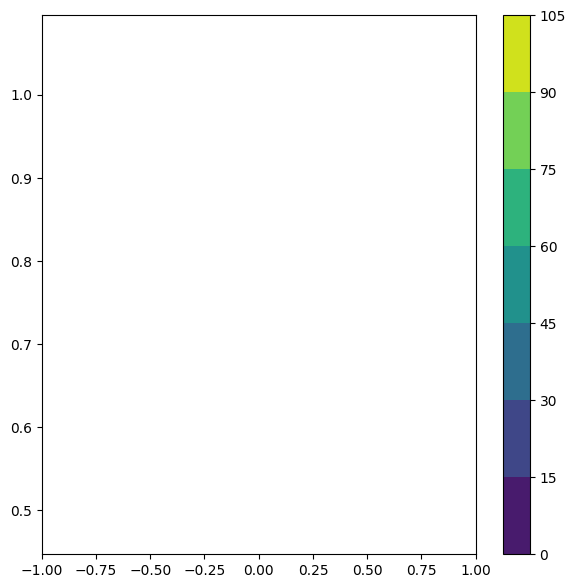

array([[  4.77225575,   4.78099265,   4.78976019, ..., 104.38935979,
        104.58079245, 104.77225575],
       [  4.77225575,   4.78099265,   4.78976019, ..., 104.38935979,
        104.58079245, 104.77225575],
       [  4.77225575,   4.78099265,   4.78976019, ..., 104.38935979,
        104.58079245, 104.77225575],
       ...,
       [  4.77225575,   4.78099265,   4.78976019, ..., 104.38935979,
        104.58079245, 104.77225575],
       [  4.77225575,   4.78099265,   4.78976019, ..., 104.38935979,
        104.58079245, 104.77225575],
       [  4.77225575,   4.78099265,   4.78976019, ..., 104.38935979,
        104.58079245, 104.77225575]])

In [ ]:
X,Y=np.meshgrid(clmind,clopt)
ldmax = 1/((4*k*CDmin+(2*k*X)**2)**0.5-2*k*X)
fig,ax = plt.subplots(figsize=(7,7))
graf = ax.contourf(X,Y,ldmax)
fig.colorbar(graf)
plt.show()
ldmax

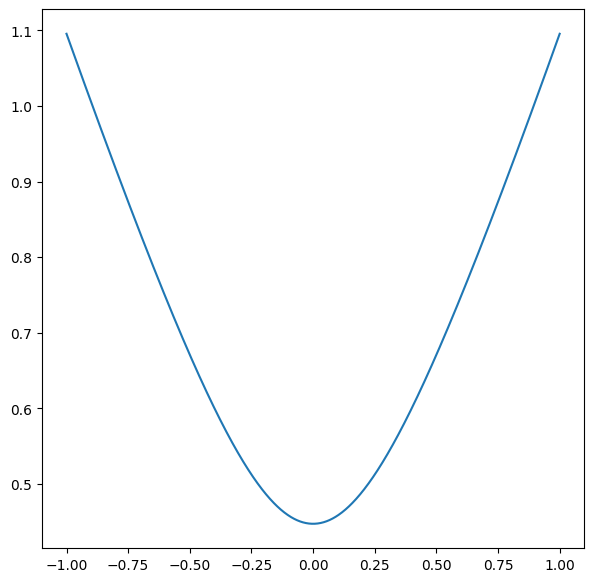

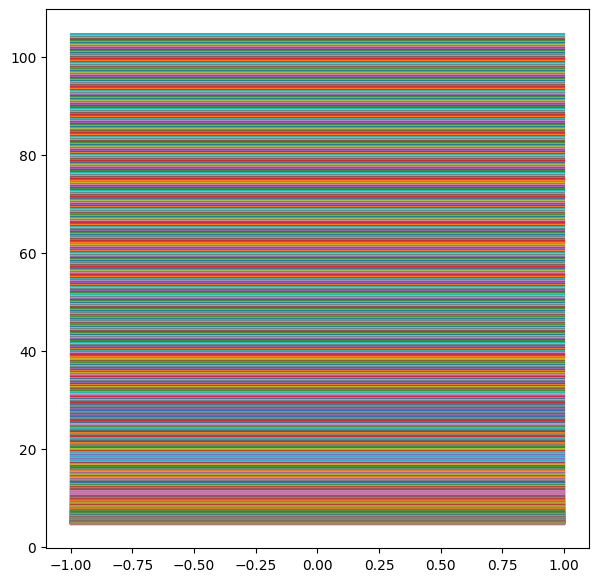

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))

ax.plot(clmind,clopt)
fig,ax=plt.subplots(figsize=(7,7))

ax.plot(clmind,ldmax)

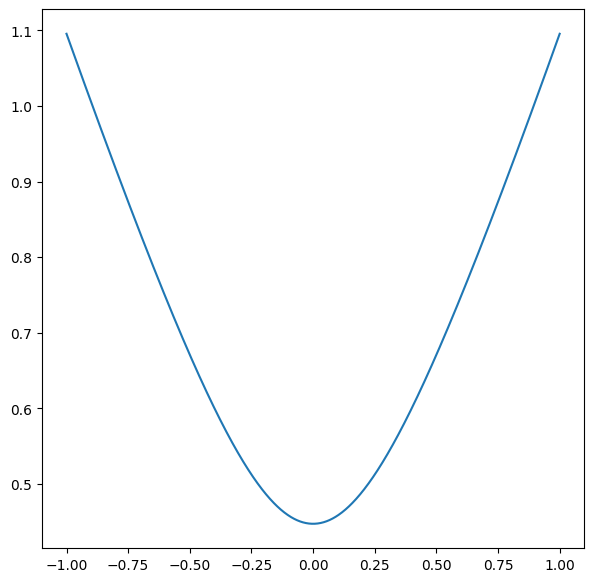

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))

ax.plot(clmind,clopt)
#40.16

In [ ]:
from scipy.optimize import root

LDmax = 45.5
LDmax = 23.6
def cal(clmind):
  return LDmax*((4*k*CDmin+(2*k*clmind)**2)**0.5-2*k*clmind)-1

sol = root(cal,0,tol=1e-6)
sol.x

array([0.02413559])

In [ ]:
clmind = sol.x
clopt = (CDmin/k+clmind**2)**0.5
clopt

array([0.44786441])

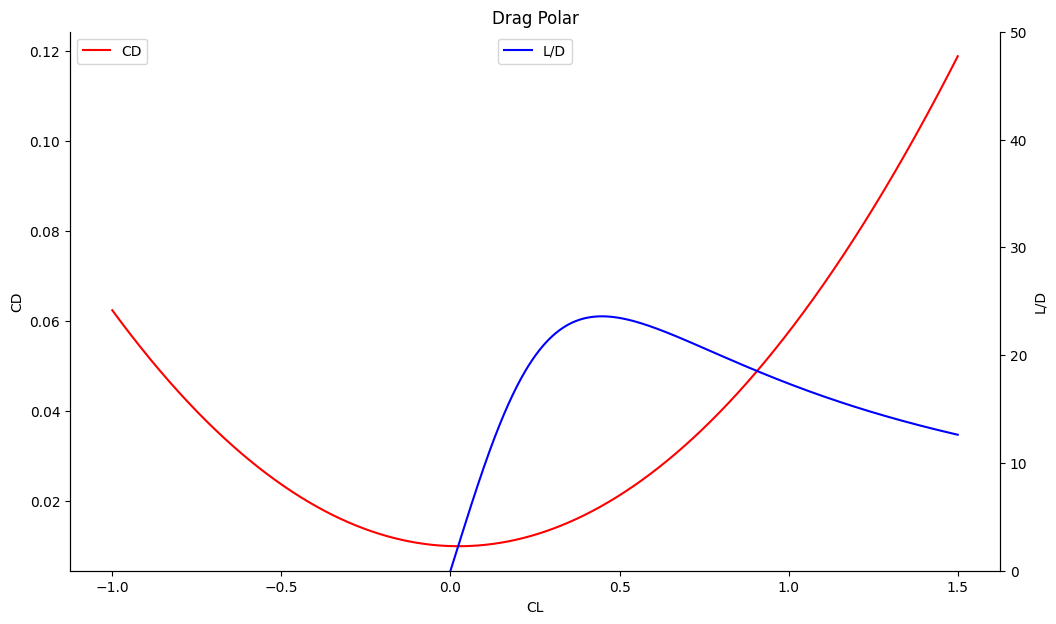

In [ ]:
N=1000
CL = np.linspace(-1,1.5,N)
CD = CDmin + k*(CL-clmind)**2
LD = CL/CD
fig,ax1 = plt.subplots(figsize=(12,7))
ax2 = ax1.twinx()
ax1.plot(CL,CD,"r-",label="CD")
ax2.plot(CL,LD,"b-",label="L/D")

ax2.set_ylim(0,  50)
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_ylabel("L/D")
ax1.set_ylabel("CD")
ax1.set_xlabel("CL")

ax1.set_title("Drag Polar")
ax1.legend()
ax2.legend(loc="upper center")
#extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('DragPolar.png')


In [ ]:
import numpy as np
mcl=(1.81-5.431734253969999759e-01)/12.41
#acl0=-5.431734253969999759e-01/mcl-
mcl*180/np.pi

5.848816768716103

In [ ]:
#5.79
#5.695e-1

In [ ]:
%%file GOE692.dat
GOE 692 AIRFOIL
       17.       17.

 0.0000000 0.0000000
 0.0125000 0.0280900
 0.0250000 0.0416900
 0.0500000 0.0613700
 0.0750000 0.0760600
 0.1000000 0.0867500
 0.1500000 0.1031300
 0.2000000 0.1145000
 0.3000000 0.1277500
 0.4000000 0.1305000
 0.5000000 0.1247500
 0.6000000 0.1110000
 0.7000000 0.0917500
 0.8000000 0.0665000
 0.9000000 0.0382500
 0.9500000 0.0226300
 1.0000000 0.0050000

 0.0000000 0.0000000
 0.0125000 -.0204100
 0.0250000 -.0273100
 0.0500000 -.0346300
 0.0750000 -.0379400
 0.1000000 -.0397500
 0.1500000 -.0398700
 0.2000000 -.0380000
 0.3000000 -.0332500
 0.4000000 -.0285000
 0.5000000 -.0237500
 0.6000000 -.0190000
 0.7000000 -.0142500
 0.8000000 -.0095000
 0.9000000 -.0047500
 0.9500000 -.0023700
 1.0000000 0.0000000

Writing GOE692.dat


## Landing Gear

In [ ]:
dW=3.793
cr=1.4214259578514443
dMG=dW+(cr*0.55)
dCG2=4.124
dCG1=3.858
lMGCG2=dMG-dCG2
lMGCG1=dMG-dCG1
lGS =lMGCG1/0.2
dNG=dMG-lGS
dMG,lMGCG1,lMGCG2,lGS,dNG
#Distancia al main gear, entre gears y al nose gear

(4.574784276818295,
 0.7167842768182946,
 0.450784276818295,
 3.583921384091473,
 0.9908628927268217)

In [ ]:
(1.8-lMGCG1/lGS)*9.81*lGS/3.048
#lNGCG2=dCG2-dNG
#J=0.8*9.81*lGS/3.048
#J
#(0.2*((4.57477-4.125)+2.2538500000000017-(4.57477-4.125))-(4.57477-4.125))/0.4

18.455784135400183

In [ ]:
dw = 1.51*1467**0.349*0.0254

## Estabilidad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Ul = 50
m = 1466.851
Iyy =  2685.943
Cla = 6.1202044
CD1 = 0.0505262
Cmq = -18.3018624

Za = -(qC*S*(Cla+CD1))/m
Mq = 0.5*qC*S*cMGC**2*Cmq/Iyy/Ul
Cma = -2.5739018

Ma = qC*S*cMGC*Cma/Iyy

wsp = (Za*Mq/Ul-Ma)**0.5
fsp = -(Mq+Za/Ul+Ma)/(2*wsp)
wsp,fsp

(4.521537335874949, 2.349150621448808)

In [ ]:
(-Ma)**0.5

4.282945741736621

In [ ]:

rho = density(hC)
g = 9.81
#S
m=1466.851
Clu = 0.0101654
Cl1 = 0.3837604
CDu = 0.0007736
CTxu = -0.0007736
wph = (rho*g*S/2/m*(Clu+2*Cl1))**0.5
fph = (2**0.5*(CDu-CTxu))/(4*Cl1)
wph,fph

(0.192028395090307, 0.001425414935793045)

In [ ]:
Ixy= 0.039
Iyz= 0.008
Ixx= 4891.801
Ixz= 234.512
Izz= 7490.203
Cyb= -0.4601877
Cyr= 0.1468536
Cnb= 0.0580614#
Cnr= -0.0382168
Clb = 0.0362709#
Clr = -0.1742029
Clp = -0.8246448


Nb=(qC*S*b*Cnb)/(Izz)
Yb=(qC*S*Cyb)/m
U1=50
Yr=(qC*S*b**Cyr)/(2*m*U1)
Nr=(qC*S*b**2*Cnr)/(2*Izz*U1)

Lb = qC*S*b*Clb/Ixx
Lr = 0.5*qC*S*b**2*Clr/Ixx/U1
Lp = 0.5*qC*S*b**2*Clp/Ixx/U1


A1=Ixz/Ixx
wd = (Nb+(Yb*Nr-Nb*Yr)/U1)**0.5
fd = -(Nr+Yb/U1)/2/wd
td = (Lb+Nb*A1)/(Lb*Nr-Nb*Lr)
tr = -1/Lp
wd,fd,td,tr

(1.4968556870220036,
 0.11618146780552994,
 0.7048686435800998,
 0.12792330887613995)

In [ ]:
wd = Nb**0.5
wd

1.4907536432904385

In [ ]:
#Xu =
#Zu =
#wph = (-g*Zu/U1)**0.5
#fph = (-Xu)/(2*wph)

## Performance

### Take Off Performance


In [ ]:
CLTO,CDTO,density(0),S,Vlof

(1.5702479338842974,
 0.009999999999999998,
 1.22661378741097,
 16.668502236802812,
 34.518)

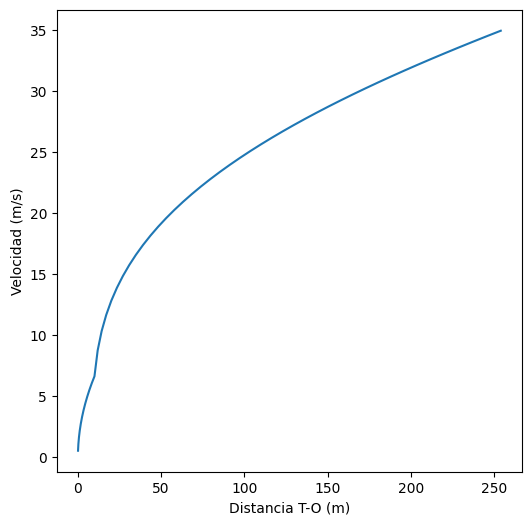

In [ ]:
import numpy as np
g = 9.81
m = 1466.851
n = 0.8
P = 150*735.5
u = 0.06
### Preparando entorno
vold = 0
i=0
rho = density(0)
v = 0
t = 0
dt = 0.25
Sg = 0

its = [0]
Ls = [0]
Ds = [0]
Ts = [0]
As = [0]
Sgs = [S]
vs = [v]
ts = [t]
Dp = 66.58
Pg = 0.8*Dp
while v<=Vlof:
  i+=1
  its.append(i)
  L = 0.5*rho*v**2*S*CLTO
  Ls.append(L)
  D = 0.5*rho*v**2*S*CDTO
  Ds.append(D)
  if t<3:
    T = 4.44822*10000*(11.22-5.7*Pg/Dp)*150/2387/Dp
    T = 4.44822*(550*150)**(2/3)*(2*0.002378*(np.pi*(Dp/12)**2/4))**(1/3)
  else:
    T = n*P/v
  Ts.append(T)
  q = 0.5*rho*vs[i-1]**2
  A = 1/m*(T-D-u*(m*g-L))
  v += A*dt
  vs.append(v)
  Sg += vs[i-1]*dt+0.5*A*dt**2
  Sgs.append(Sg)
  t+=dt
  #print(L,D,T,A,v,Sg,t)
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (6,6))
ax.plot(Sgs[1:],vs[1:])
ax.set_xlabel('Distancia T-O (m)')
ax.set_ylabel('Velocidad (m/s)')
fig.savefig('TOvsV.png')

In [ ]:
Sgs[-1],t

(254.08617875784552, 13.25)

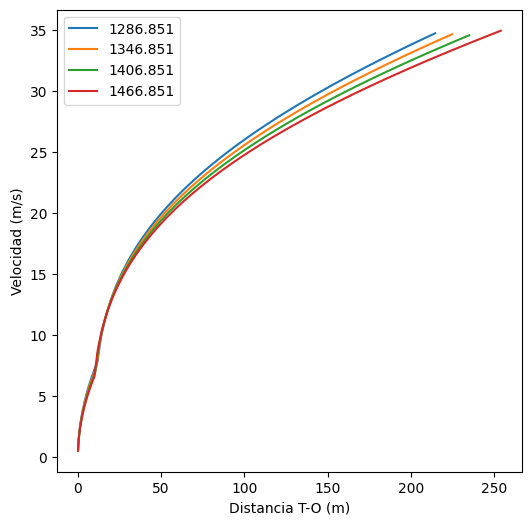

In [ ]:
import numpy as np
g = 9.81
ms = [1466.851-180,1466.851-120,1466.851-60,1466.851]
n = 0.8
P = 150*735.5
u = 0.06
### Preparando entorno
Sgss = []
vss = []

for m in ms:
  i=0
  rho = density(0)
  v = 0
  t = 0
  dt = 0.25
  Sg = 0

  its = [0]
  Ls = [0]
  Ds = [0]
  Ts = [0]
  As = [0]
  Sgs = [S]
  vs = [v]
  ts = [t]
  Dp = 66.58
  Pg = 0.8*Dp
  while v<=Vlof:
    i+=1
    its.append(i)
    L = 0.5*rho*v**2*S*CLTO
    Ls.append(L)
    D = 0.5*rho*v**2*S*CDTO
    Ds.append(D)
    if t<3:
      T = 4.44822*10000*(11.22-5.7*Pg/Dp)*150/2387/Dp
      T = 4.44822*(550*150)**(2/3)*(2*0.002378*(np.pi*(Dp/12)**2/4))**(1/3)
    else:
      T = n*P/v
    Ts.append(T)
    q = 0.5*rho*vs[i-1]**2
    A = 1/m*(T-D-u*(m*g-L))
    v += A*dt
    vs.append(v)
    Sg += vs[i-1]*dt+0.5*A*dt**2
    Sgs.append(Sg)
    t+=dt
  #print(L,D,T,A,v,Sg,t)
  Sgss.append(Sgs)
  vss.append(vs)
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (6,6))
for i in range(len(ms)):
  ax.plot(Sgss[i][1:],vss[i][1:],label=str(ms[i]))
ax.set_xlabel('Distancia T-O (m)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend()
fig.savefig('MsTOvsV.png')

### Obstacle distance

In [ ]:
import numpy as np
g = 9.81
m = 1466.851
n = 0.8
P = 150*735.5
u = 0.06
### Preparando entorno
vold = 0
i=0
rho = density(0)
v = 0
t = 0
dt = 0.25
Sg = 0

its = [0]
Ls = [0]
Ds = [0]
Ts = [0]
As = [0]
Sgs = [S]
vs = [v]
ts = [t]
Dp = 66.58
Pg = 0.8*Dp
while v<=Vlof:
  i+=1
  its.append(i)
  L = 0.5*rho*v**2*S*CLTO
  Ls.append(L)
  D = 0.5*rho*v**2*S*CDTO
  Ds.append(D)
  if t<3:
    T = 4.44822*10000*(11.22-5.7*Pg/Dp)*150/2387/Dp
    T = 4.44822*(550*150)**(2/3)*(2*0.002378*(np.pi*(Dp/12)**2/4))**(1/3)
  else:
    T = n*P/v
  Ts.append(T)
  q = 0.5*rho*vs[i-1]**2
  A = 1/m*(T-D-u*(m*g-L))
  v += A*dt
  vs.append(v)
  Sg += vs[i-1]*dt+0.5*A*dt**2
  Sgs.append(Sg)
  t+=dt


gamma = np.arcsin(T/(m*g)-Ds[-1]/Ls[-1])
R = 0.2156*Vsto**2
Str = R*np.sin(gamma)
htr = R*(1-np.cos(gamma))
hobst= 50*0.3048
Sc = (hobst-htr)/np.tan(gamma)
Sc+Str

105.83293135872822

In [ ]:
htr,hobst

(3.15025454547271, 15.24)

## Climb Performance

In [ ]:
k = 1/np.pi/ARe
VY=(2/density(hCS)*WS*k**0.5/((3*CDmin+4*k*clmind[0]**2)**0.5-k**0.5*clmind[0]))**0.5
VY

57.275479584939696

In [ ]:
Vvopt = n*P/(m*g)-VY*1.1547/LDmax
Vvopt

3.3311349714820273

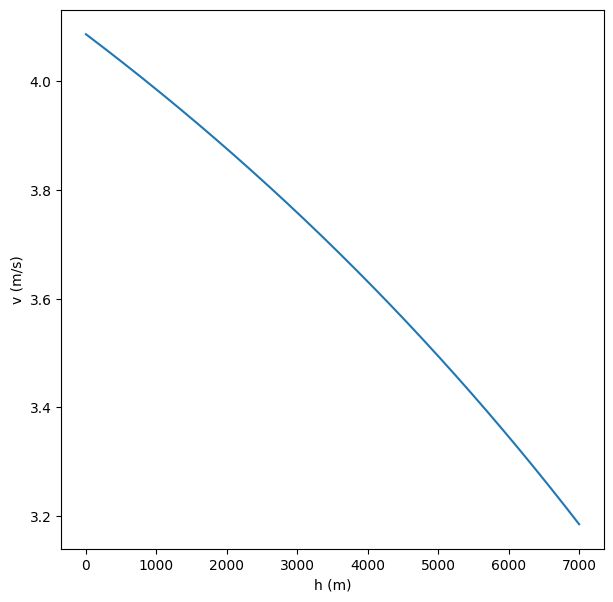

In [ ]:
N = 1000
hs = np.linspace(0,7000,N)
Vvopts = np.zeros(N)
VYs = np.zeros(N)
for i,h in enumerate(hs):
  VY=(2/density(h)*WS*k**0.5/((3*CDmin+4*k*clmind[0]**2)**0.5-k**0.5*clmind[0]))**0.5
  Vvopt = n*P/(m*g)-VY*1.1547/LDmax
  VYs[i] = VY
  Vvopts[i] = Vvopt

fig,ax = plt.subplots(figsize=(7,7))
ax.plot(hs,Vvopts)
ax.set_ylabel('v (m/s)')
ax.set_xlabel('h (m)')
fig.savefig('hvsV')

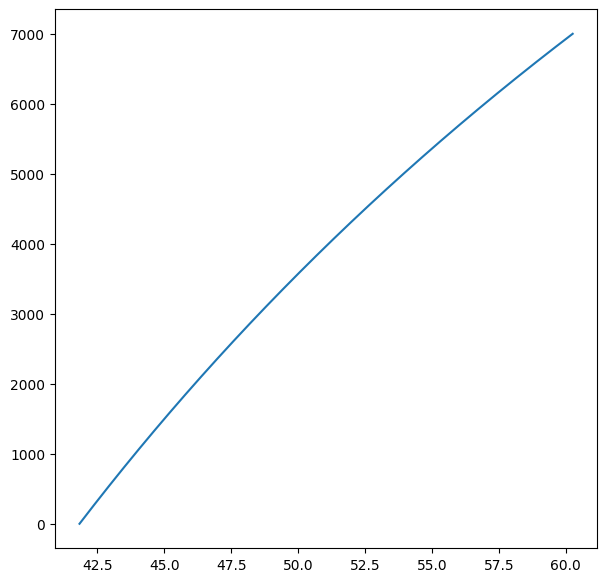

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(VYs,hs)

In [ ]:
Vvopt = n*P/(m*g)-0.503*1.1547/LDmax
Vvopt

6.108896928123124

In [ ]:
a,b,c = np.polyfit(Vvopts,hs,2)
#Vvopt0 = n*P/(m*g)
habsc = a*Vvopt0**2+b*Vvopt0+c
Vvoptf = 0.503
hsc = a*Vvoptf**2+b*Vvoptf+c
hsc,c

NameError: ignored

In [ ]:
a,b,c,hC

In [ ]:
a,b = np.polyfit(hs,Vvopts,1)
#Vvopt0 = n*P/(m*g)
vv1 = a*hC+b
vv2 = b
t = (np.log(a*hC+b)-np.log(b))/a
#Vvoptf = 0.503
#hsc = a*Vvoptf**2+b*Vvoptf+c
#hsc,c
t/60 # Tiempo ascenso


15.69123572885519

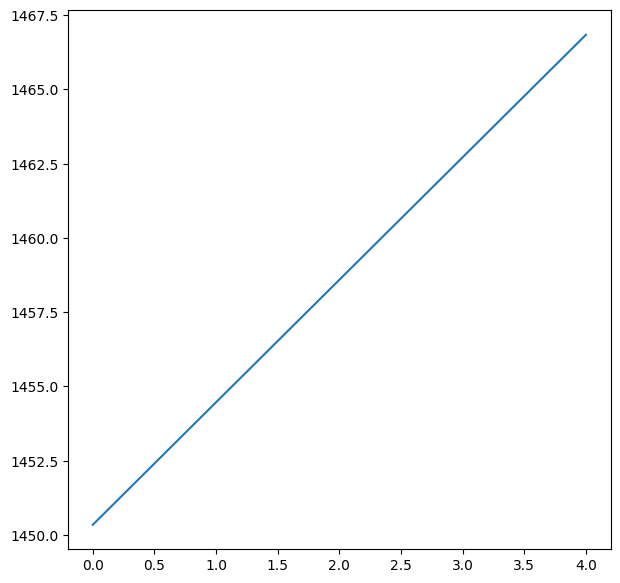

In [ ]:
vvss = np.linspace(0,4,1000)
hss = a*vvss**2 + b*vvss + c
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(vvss,hss)

In [ ]:
a,b,c

(-0.00012803322317352526, 4.124272291746128, 1450.3406698173733)

In [ ]:
from scipy.optimize import root
def gammaa(vx):
  return vx**4+vx*n*P/density(hCS)/S/CDmin-(WS)**2*4*k/density(hCS)**2/CDmin
sol = root(gammaa,5)

In [ ]:
vxx = sol.x[0]
T = n*P/vxx
q = 0.5*density(hCS)*vxx**2
gammaopt = np.arcsin(T/m/g - q*CDmin/WS-k*WS/q)
gammaopt*180/np.pi

4.370056248732577

In [ ]:
#T/W-D/L
#T/m/g - q*CDmin/WS-k*WS/q

### Cruise Performance

In [ ]:
#vinf = 5
Vminold = 20
while True:
  Tav = n*1000*P/Vminold
  q1 = Tav+2*k*m*g*clmind
  q2 = CDmin+k*clmind**2
  Vmin = ((q1-(q1**2-4*k*(m*g)**2*q2)**0.5)/(density(hC)*S*q2))**0.5
  if abs(Vmin-Vminold)<1e-9:
    break
  else:
    Vminold = Vmin
  print(Vminold,Vmin)
Vmin

[0.53863203] [0.53863203]
[0.08839462] [0.08839462]
[0.03580702] [0.03580702]
[0.02280134] [0.02280134]
[0.01822267] [0.01822267]
[0.01638096] [0.01638096]
[0.01554035] [0.01554035]
[0.0151025] [0.0151025]
[0.01487875] [0.01487875]
[0.01465158] [0.01465158]


array([0.01465158])

In [ ]:
def vmaxprop(vmax):
  return density(hC)*S*CDmin*vmax**3-1000*n*P-((1000*n*P)**2-4*k*(m*g)**2*vmax**2*CDmin)**0.5

sol = root(vmaxprop,1)
sol.x

array([1075.73389666])

In [ ]:
vmaxprop(sol.x)

array([4.47034836e-08])

In [ ]:
Vstall = (2*m*g/density(hC)/S/CLmax)**0.5
Vstall

35.61605063245193

In [ ]:
CL = (3*CDmin/k+4*clmind**2)**0.5-clmind#CDmin+k*clmind**2
Vtrmin = (2/density(hC)*WS*(k/(CDmin+k*clmind**2))**0.5)**0.5
Ttrmin = m*g*(k/CDmin)**0.5*(CDmin+k*(CL-clmind)**3)
VEmax = (2/density(hC)*WS*(k**0.5/(3*CDmin+4*k*clmind**2)**0.5-clmind*k**0.5))**0.5
Vtrmin,Ttrmin,VEmax


(array([65.14669399]), array([928.99151128]), array([49.38655167]))

In [ ]:
LDmax